# TC 3007B
## Word Embeddings


## Equipo: Foraneos y un Emi

### Carolina Arratia Camacho - A01367552

### Emiliano Mendoza Nieto - A01706083

### Frida Lizett Zavala Pérez - A01275226

### Fabián González Vera - A01367585

### Jazzareth Bernal Martínez- A01367882

<br>

#### Activity 2: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


### Import libraries

In [ ]:
# conda install -c pytorch torchtext
# conda install -c pytorch torchdata
# conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

In [ ]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
# import scikitplot as skplt
import gc

from tqdm import tqdm

In [ ]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [ ]:
!pip install 'portalocker>=2.0.0'

In [ ]:
# Convert a dataset into a format that's easier to work with in PyTorch
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [ ]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

In [ ]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [ ]:
# Length
len(vocab)

95811

In [ ]:
#test tokens
tokens = tokeniser('Welcome to TC3007')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc3007'] [3314, 4, 0]


In [ ]:
# Splitting the Dataset into Training and Validation Sets
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [ ]:
# Split train and validation
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [ ]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    # Padding con ceros o crop si es muy largo el enunciado
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [ ]:
# Define the labels for the AG_NEWS dataset categories
labels =  ["World", "Sports", "Business", "Sci/Tech"]
# Set the maximum number of tokens for processing texts
max_tokens = 50
# Define the batch size for data loaders
BATCH_SIZE = 256

In [ ]:
collate_batch(test_dataset[1:2])

(tensor([[    2,   493,    21,    10,   127,   929,   111,  1098,   421,  1838,
             11,   761, 10409,    13,   180,     1,   172,    14,   180,     1,
            172,    15,   737,     3,   566,    53,     5,     0,     6, 29616,
           3954,    11,     2,   468,   204,    82,  6155,  2002,  1139,     3,
              5,  3583,     0,  8081, 14647,   180,   837,     3,    28,  2446]],
        dtype=torch.int32),
 tensor([3], dtype=torch.int32))

In [ ]:
# Create a DataLoader for the training dataset.
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
# Create a DataLoader for the validation dataset.
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
# Create a DataLoader for the test dataset.
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

In [ ]:
# Iterate through the validation dataset using the val_loader
for i, (x,y) in enumerate(val_loader):
  print(i, x.shape, y.shape)
  if i>10: break

0 torch.Size([256, 50]) torch.Size([256])
1 torch.Size([256, 50]) torch.Size([256])
2 torch.Size([256, 50]) torch.Size([256])
3 torch.Size([256, 50]) torch.Size([256])
4 torch.Size([256, 50]) torch.Size([256])
5 torch.Size([256, 50]) torch.Size([256])
6 torch.Size([256, 50]) torch.Size([256])
7 torch.Size([256, 50]) torch.Size([256])
8 torch.Size([256, 50]) torch.Size([256])
9 torch.Size([256, 50]) torch.Size([256])
10 torch.Size([256, 50]) torch.Size([256])
11 torch.Size([256, 50]) torch.Size([256])


### Let us build our RNN model

In [ ]:
EMBEDDING_SIZE = 50 # 300
NEURONS = 150 # 256 W
LAYERS = 2 # 2
NUM_CLASSES = 4

In [ ]:
# defines a simple RNN-based neural network for classification
class GRU_Model_1(nn.Module):
  def __init__(self, embed_size, hidden, layers, num_classes):
      super().__init__()
      self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                          embedding_dim=embed_size)

      self.rnn = nn.RNN(input_size = embed_size, # You may use PyTorch nn.GRU(), nn.RNN(), or nn.LSTM()
                        hidden_size = hidden, # número de neuronas
                        num_layers = layers,
                        batch_first = True,
                        bidirectional = False)

      self.fc = nn.Linear(in_features = hidden, out_features = num_classes) # 100, 4

  def forward(self, x):
      vector_embs = self.embedding_layer(x)
      y, h = self.rnn(vector_embs)
      #Output for last timestep
      return self.fc(y[:, -1]) # Número de timesteps
      # implement forward pass. This function will be called when executing the model

In [ ]:
gru_model = GRU_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
gru_model

GRU_Model_1(
  (embedding_layer): Embedding(95811, 50)
  (rnn): RNN(50, 150, num_layers=2, batch_first=True)
  (fc): Linear(in_features=150, out_features=4, bias=True)
)

In [ ]:
# Iterate through the children (layers) of the GRU model
for l in gru_model.children():
  print(f'Layer: {l}:')
  for p in l.parameters():
    print(f'\t {p.shape}')
    print()

'''
Wh - 100,50
Wx - 100,100
bx - 100
bh - 100
'''

Layer: Embedding(95811, 50):
	 torch.Size([95811, 50])

Layer: RNN(50, 150, num_layers=2, batch_first=True):
	 torch.Size([150, 50])

	 torch.Size([150, 150])

	 torch.Size([150])

	 torch.Size([150])

	 torch.Size([150, 150])

	 torch.Size([150, 150])

	 torch.Size([150])

	 torch.Size([150])

Layer: Linear(in_features=150, out_features=4, bias=True):
	 torch.Size([4, 150])

	 torch.Size([4])



'\nWh - 100,50\nWx - 100,100\nbx - 100\nbh - 100\n'

In [ ]:
#output = gru_model(torch.randint(low =0 , highh=len(vocab), size = (1)))

In [ ]:
def accuracy(model, loader):
    # Initialize counters for correct predictions and total samples
    num_correct = 0
    num_total = 0

    # Set the model to evaluation mode.
    model.eval()

    # Move the model to the specified device (CPU or GPU)
    model = model.to(device=device)

    # Disables gradient calculations, saving memory and computations, since they're not needed for model evaluation
    with torch.no_grad():
        # Iterate over the batches of data in the loader
        for x, y in loader:
            # Move the data to the same device as the model
            x = x.to(device=device, dtype=torch.long)
            y = y.to(device=device, dtype=torch.long)

            # Forward pass: compute the model's predictions for the batch
            scores = model(x)

            # Get the predicted class for each example in the batch
            _, preds = scores.max(dim=1)

            # Count how many predictions match the true labels
            num_correct += (preds == y).sum()

            # Increment the total number of examples processed
            num_total += preds.size(0)

        # Calculate the accuracy as the ratio of correct predictions to total examples
        acc = float(num_correct) / num_total

        # Return the calculated accuracy
        return acc


In [ ]:
def train(model, optimiser, scheduler=None, epochs=100):
    # Move the model to the specified device (CPU or GPU)
    model = model.to(device=device)

    # Loop over the number of epochs
    for epoch in range(epochs):
        # Iterate over batches of data in the training loader
        for i, (x, y) in enumerate(tqdm(train_loader)):
            # Set the model to training mode.
            model.train()

            # Move the data to the same device as the model
            x = x.to(device=device, dtype=torch.long)
            y = y.to(device=device, dtype=torch.long)

            # Forward pass: compute the model's predictions for the batch
            scores = model(x)

            # Compute the loss (cost) using the model's predictions and the true labels
            cost = F.cross_entropy(input=scores, target=y)

            # Zero the gradients before running the backward pass
            optimiser.zero_grad()

            # Backward pass: compute the gradient of the loss with respect to model parameters
            cost.backward()

            # Update the model's parameters
            optimiser.step()

            # Update the learning rate if a scheduler is provided
            if scheduler:
                scheduler.step()

        # Compute and print the accuracy on the validation set after each epoch
        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, costo: {cost.item():.4f}, val accuracy: {acc:.4f}')
        pass


In [ ]:
epochs = 150 # define
lr = 0.00001 # to do
# instantiate model
rnn_model = GRU_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
optimiser = torch.optim.Adam(gru_model.parameters(), lr=lr)


In [ ]:
train(gru_model, optimiser=optimiser,  epochs=epochs)

100%|██████████| 422/422 [00:06<00:00, 60.44it/s]


Epoch: 0, costo: 1.3735, val accuracy: 0.2726


100%|██████████| 422/422 [00:06<00:00, 63.18it/s]


Epoch: 1, costo: 1.3734, val accuracy: 0.2762


100%|██████████| 422/422 [00:07<00:00, 54.75it/s]


Epoch: 2, costo: 1.3783, val accuracy: 0.2800


100%|██████████| 422/422 [00:06<00:00, 68.96it/s]


Epoch: 3, costo: 1.3782, val accuracy: 0.2812


100%|██████████| 422/422 [00:07<00:00, 54.75it/s]


Epoch: 4, costo: 1.3756, val accuracy: 0.2870


100%|██████████| 422/422 [00:06<00:00, 69.88it/s]


Epoch: 5, costo: 1.3720, val accuracy: 0.2821


100%|██████████| 422/422 [00:07<00:00, 53.94it/s]


Epoch: 6, costo: 1.3709, val accuracy: 0.3078


100%|██████████| 422/422 [00:07<00:00, 53.12it/s]


Epoch: 7, costo: 1.3153, val accuracy: 0.3696


100%|██████████| 422/422 [00:07<00:00, 58.27it/s]


Epoch: 8, costo: 1.2802, val accuracy: 0.3852


100%|██████████| 422/422 [00:06<00:00, 63.77it/s]


Epoch: 9, costo: 1.2701, val accuracy: 0.3986


100%|██████████| 422/422 [00:06<00:00, 61.69it/s]


Epoch: 10, costo: 1.2340, val accuracy: 0.4069


100%|██████████| 422/422 [00:06<00:00, 60.94it/s]


Epoch: 11, costo: 1.2370, val accuracy: 0.4113


100%|██████████| 422/422 [00:06<00:00, 66.21it/s]


Epoch: 12, costo: 1.2405, val accuracy: 0.4198


100%|██████████| 422/422 [00:07<00:00, 56.48it/s]


Epoch: 13, costo: 1.2194, val accuracy: 0.4240


100%|██████████| 422/422 [00:06<00:00, 67.39it/s]


Epoch: 14, costo: 1.2415, val accuracy: 0.4303


100%|██████████| 422/422 [00:07<00:00, 54.59it/s]


Epoch: 15, costo: 1.1664, val accuracy: 0.4397


100%|██████████| 422/422 [00:06<00:00, 68.87it/s]


Epoch: 16, costo: 1.1747, val accuracy: 0.4489


100%|██████████| 422/422 [00:07<00:00, 53.70it/s]


Epoch: 17, costo: 1.1328, val accuracy: 0.4549


100%|██████████| 422/422 [00:06<00:00, 68.41it/s]


Epoch: 18, costo: 1.1651, val accuracy: 0.4615


100%|██████████| 422/422 [00:07<00:00, 53.20it/s]


Epoch: 19, costo: 1.1501, val accuracy: 0.4693


100%|██████████| 422/422 [00:06<00:00, 67.77it/s]


Epoch: 20, costo: 1.1396, val accuracy: 0.4806


100%|██████████| 422/422 [00:07<00:00, 54.85it/s]


Epoch: 21, costo: 1.1024, val accuracy: 0.4881


100%|██████████| 422/422 [00:06<00:00, 62.43it/s]


Epoch: 22, costo: 1.0540, val accuracy: 0.4956


100%|██████████| 422/422 [00:06<00:00, 61.27it/s]


Epoch: 23, costo: 1.0590, val accuracy: 0.5022


100%|██████████| 422/422 [00:07<00:00, 60.06it/s]


Epoch: 24, costo: 1.0229, val accuracy: 0.5140


100%|██████████| 422/422 [00:06<00:00, 66.52it/s]


Epoch: 25, costo: 1.0046, val accuracy: 0.5188


100%|██████████| 422/422 [00:07<00:00, 54.58it/s]


Epoch: 26, costo: 1.0149, val accuracy: 0.5337


100%|██████████| 422/422 [00:06<00:00, 67.41it/s]


Epoch: 27, costo: 0.9759, val accuracy: 0.5457


100%|██████████| 422/422 [00:07<00:00, 54.43it/s]


Epoch: 28, costo: 1.0871, val accuracy: 0.5540


100%|██████████| 422/422 [00:06<00:00, 67.03it/s]


Epoch: 29, costo: 1.0326, val accuracy: 0.5667


100%|██████████| 422/422 [00:07<00:00, 52.85it/s]


Epoch: 30, costo: 1.0228, val accuracy: 0.5705


100%|██████████| 422/422 [00:06<00:00, 65.78it/s]


Epoch: 31, costo: 0.9805, val accuracy: 0.5798


100%|██████████| 422/422 [00:07<00:00, 53.74it/s]


Epoch: 32, costo: 0.9175, val accuracy: 0.5845


100%|██████████| 422/422 [00:06<00:00, 65.76it/s]


Epoch: 33, costo: 0.9852, val accuracy: 0.5945


100%|██████████| 422/422 [00:07<00:00, 58.38it/s]


Epoch: 34, costo: 0.9203, val accuracy: 0.6007


100%|██████████| 422/422 [00:07<00:00, 59.17it/s]


Epoch: 35, costo: 0.8151, val accuracy: 0.6057


100%|██████████| 422/422 [00:06<00:00, 65.06it/s]


Epoch: 36, costo: 0.8905, val accuracy: 0.6145


100%|██████████| 422/422 [00:07<00:00, 55.39it/s]


Epoch: 37, costo: 0.9521, val accuracy: 0.6215


100%|██████████| 422/422 [00:06<00:00, 65.64it/s]


Epoch: 38, costo: 0.9014, val accuracy: 0.6280


100%|██████████| 422/422 [00:07<00:00, 53.95it/s]


Epoch: 39, costo: 0.8596, val accuracy: 0.6296


100%|██████████| 422/422 [00:06<00:00, 68.50it/s]


Epoch: 40, costo: 0.9325, val accuracy: 0.6356


100%|██████████| 422/422 [00:07<00:00, 53.55it/s]


Epoch: 41, costo: 0.8786, val accuracy: 0.6470


100%|██████████| 422/422 [00:06<00:00, 66.61it/s]


Epoch: 42, costo: 0.8900, val accuracy: 0.6490


100%|██████████| 422/422 [00:07<00:00, 52.90it/s]


Epoch: 43, costo: 0.7426, val accuracy: 0.6569


100%|██████████| 422/422 [00:06<00:00, 68.62it/s]


Epoch: 44, costo: 0.7688, val accuracy: 0.6607


100%|██████████| 422/422 [00:07<00:00, 55.63it/s]


Epoch: 45, costo: 0.8560, val accuracy: 0.6687


100%|██████████| 422/422 [00:06<00:00, 61.41it/s]


Epoch: 46, costo: 0.7912, val accuracy: 0.6675


100%|██████████| 422/422 [00:06<00:00, 61.35it/s]


Epoch: 47, costo: 0.8583, val accuracy: 0.6738


100%|██████████| 422/422 [00:07<00:00, 56.35it/s]


Epoch: 48, costo: 0.7885, val accuracy: 0.6797


100%|██████████| 422/422 [00:06<00:00, 67.40it/s]


Epoch: 49, costo: 0.7629, val accuracy: 0.6883


100%|██████████| 422/422 [00:07<00:00, 54.53it/s]


Epoch: 50, costo: 0.8286, val accuracy: 0.6895


100%|██████████| 422/422 [00:06<00:00, 69.03it/s]


Epoch: 51, costo: 0.7016, val accuracy: 0.6933


100%|██████████| 422/422 [00:07<00:00, 55.81it/s]


Epoch: 52, costo: 0.7316, val accuracy: 0.6948


100%|██████████| 422/422 [00:05<00:00, 70.78it/s]


Epoch: 53, costo: 0.6920, val accuracy: 0.7001


100%|██████████| 422/422 [00:07<00:00, 55.00it/s]


Epoch: 54, costo: 0.7561, val accuracy: 0.7037


100%|██████████| 422/422 [00:06<00:00, 68.78it/s]


Epoch: 55, costo: 0.8035, val accuracy: 0.7067


100%|██████████| 422/422 [00:09<00:00, 44.84it/s]


Epoch: 56, costo: 0.7049, val accuracy: 0.7124


100%|██████████| 422/422 [00:06<00:00, 68.32it/s]


Epoch: 57, costo: 0.7173, val accuracy: 0.7128


100%|██████████| 422/422 [00:07<00:00, 55.01it/s]


Epoch: 58, costo: 0.6877, val accuracy: 0.7199


100%|██████████| 422/422 [00:05<00:00, 70.79it/s]


Epoch: 59, costo: 0.7951, val accuracy: 0.7203


100%|██████████| 422/422 [00:07<00:00, 55.26it/s]


Epoch: 60, costo: 0.6657, val accuracy: 0.7203


100%|██████████| 422/422 [00:05<00:00, 70.48it/s]


Epoch: 61, costo: 0.7394, val accuracy: 0.7223


100%|██████████| 422/422 [00:07<00:00, 54.37it/s]


Epoch: 62, costo: 0.5954, val accuracy: 0.7293


100%|██████████| 422/422 [00:06<00:00, 67.95it/s]


Epoch: 63, costo: 0.6968, val accuracy: 0.7340


100%|██████████| 422/422 [00:07<00:00, 57.12it/s]


Epoch: 64, costo: 0.6645, val accuracy: 0.7278


100%|██████████| 422/422 [00:06<00:00, 63.62it/s]


Epoch: 65, costo: 0.5995, val accuracy: 0.7386


100%|██████████| 422/422 [00:06<00:00, 61.01it/s]


Epoch: 66, costo: 0.6595, val accuracy: 0.7408


100%|██████████| 422/422 [00:07<00:00, 56.94it/s]


Epoch: 67, costo: 0.8423, val accuracy: 0.7432


100%|██████████| 422/422 [00:06<00:00, 65.86it/s]


Epoch: 68, costo: 0.5591, val accuracy: 0.7444


100%|██████████| 422/422 [00:07<00:00, 54.11it/s]


Epoch: 69, costo: 0.6099, val accuracy: 0.7471


100%|██████████| 422/422 [00:06<00:00, 68.03it/s]


Epoch: 70, costo: 0.5848, val accuracy: 0.7492


100%|██████████| 422/422 [00:07<00:00, 54.37it/s]


Epoch: 71, costo: 0.5889, val accuracy: 0.7530


100%|██████████| 422/422 [00:06<00:00, 69.08it/s]


Epoch: 72, costo: 0.6421, val accuracy: 0.7544


100%|██████████| 422/422 [00:07<00:00, 55.08it/s]


Epoch: 73, costo: 0.6227, val accuracy: 0.7572


100%|██████████| 422/422 [00:06<00:00, 69.39it/s]


Epoch: 74, costo: 0.6411, val accuracy: 0.7604


100%|██████████| 422/422 [00:07<00:00, 54.96it/s]


Epoch: 75, costo: 0.6192, val accuracy: 0.7619


100%|██████████| 422/422 [00:06<00:00, 69.40it/s]


Epoch: 76, costo: 0.5593, val accuracy: 0.7615


100%|██████████| 422/422 [00:07<00:00, 55.62it/s]


Epoch: 77, costo: 0.5806, val accuracy: 0.7656


100%|██████████| 422/422 [00:06<00:00, 64.21it/s]


Epoch: 78, costo: 0.5342, val accuracy: 0.7627


100%|██████████| 422/422 [00:07<00:00, 59.24it/s]


Epoch: 79, costo: 0.5240, val accuracy: 0.7684


100%|██████████| 422/422 [00:07<00:00, 58.04it/s]


Epoch: 80, costo: 0.5151, val accuracy: 0.7692


100%|██████████| 422/422 [00:06<00:00, 64.25it/s]


Epoch: 81, costo: 0.4490, val accuracy: 0.7718


100%|██████████| 422/422 [00:07<00:00, 53.04it/s]


Epoch: 82, costo: 0.5360, val accuracy: 0.7770


100%|██████████| 422/422 [00:06<00:00, 66.89it/s]


Epoch: 83, costo: 0.5963, val accuracy: 0.7707


100%|██████████| 422/422 [00:07<00:00, 53.84it/s]


Epoch: 84, costo: 0.4903, val accuracy: 0.7817


100%|██████████| 422/422 [00:06<00:00, 69.38it/s]


Epoch: 85, costo: 0.5593, val accuracy: 0.7792


100%|██████████| 422/422 [00:07<00:00, 55.43it/s]


Epoch: 86, costo: 0.6663, val accuracy: 0.7850


100%|██████████| 422/422 [00:06<00:00, 69.65it/s]


Epoch: 87, costo: 0.5971, val accuracy: 0.7848


100%|██████████| 422/422 [00:07<00:00, 55.26it/s]


Epoch: 88, costo: 0.5914, val accuracy: 0.7853


100%|██████████| 422/422 [00:05<00:00, 70.74it/s]


Epoch: 89, costo: 0.4927, val accuracy: 0.7871


100%|██████████| 422/422 [00:07<00:00, 53.95it/s]


Epoch: 90, costo: 0.4695, val accuracy: 0.7894


100%|██████████| 422/422 [00:06<00:00, 62.57it/s]


Epoch: 91, costo: 0.4883, val accuracy: 0.7878


100%|██████████| 422/422 [00:06<00:00, 61.08it/s]


Epoch: 92, costo: 0.5703, val accuracy: 0.7928


100%|██████████| 422/422 [00:06<00:00, 60.68it/s]


Epoch: 93, costo: 0.4832, val accuracy: 0.7948


100%|██████████| 422/422 [00:06<00:00, 64.41it/s]


Epoch: 94, costo: 0.4572, val accuracy: 0.7944


100%|██████████| 422/422 [00:07<00:00, 56.08it/s]


Epoch: 95, costo: 0.4687, val accuracy: 0.8007


100%|██████████| 422/422 [00:06<00:00, 65.93it/s]


Epoch: 96, costo: 0.4464, val accuracy: 0.7965


100%|██████████| 422/422 [00:07<00:00, 53.78it/s]


Epoch: 97, costo: 0.3945, val accuracy: 0.8012


100%|██████████| 422/422 [00:06<00:00, 66.06it/s]


Epoch: 98, costo: 0.4735, val accuracy: 0.8027


100%|██████████| 422/422 [00:07<00:00, 54.56it/s]


Epoch: 99, costo: 0.4997, val accuracy: 0.8020


100%|██████████| 422/422 [00:06<00:00, 69.24it/s]


Epoch: 100, costo: 0.5367, val accuracy: 0.8034


100%|██████████| 422/422 [00:07<00:00, 55.06it/s]


Epoch: 101, costo: 0.4534, val accuracy: 0.8027


100%|██████████| 422/422 [00:05<00:00, 70.65it/s]


Epoch: 102, costo: 0.3645, val accuracy: 0.8072


100%|██████████| 422/422 [00:07<00:00, 54.45it/s]


Epoch: 103, costo: 0.5178, val accuracy: 0.8027


100%|██████████| 422/422 [00:06<00:00, 67.56it/s]


Epoch: 104, costo: 0.4789, val accuracy: 0.8087


100%|██████████| 422/422 [00:07<00:00, 55.81it/s]


Epoch: 105, costo: 0.5392, val accuracy: 0.8099


100%|██████████| 422/422 [00:07<00:00, 58.10it/s]


Epoch: 106, costo: 0.4405, val accuracy: 0.8107


100%|██████████| 422/422 [00:07<00:00, 53.72it/s]


Epoch: 107, costo: 0.5391, val accuracy: 0.8085


100%|██████████| 422/422 [00:07<00:00, 53.96it/s]


Epoch: 108, costo: 0.5533, val accuracy: 0.8132


100%|██████████| 422/422 [00:06<00:00, 69.05it/s]


Epoch: 109, costo: 0.4959, val accuracy: 0.8137


100%|██████████| 422/422 [00:07<00:00, 54.75it/s]


Epoch: 110, costo: 0.4347, val accuracy: 0.8139


100%|██████████| 422/422 [00:06<00:00, 70.06it/s]


Epoch: 111, costo: 0.4708, val accuracy: 0.8097


100%|██████████| 422/422 [00:07<00:00, 55.19it/s]


Epoch: 112, costo: 0.3864, val accuracy: 0.8155


100%|██████████| 422/422 [00:06<00:00, 69.21it/s]


Epoch: 113, costo: 0.4706, val accuracy: 0.8154


100%|██████████| 422/422 [00:07<00:00, 56.12it/s]


Epoch: 114, costo: 0.4259, val accuracy: 0.8173


100%|██████████| 422/422 [00:06<00:00, 65.99it/s]


Epoch: 115, costo: 0.4218, val accuracy: 0.8203


100%|██████████| 422/422 [00:07<00:00, 59.97it/s]


Epoch: 116, costo: 0.3716, val accuracy: 0.8202


100%|██████████| 422/422 [00:06<00:00, 63.11it/s]


Epoch: 117, costo: 0.3989, val accuracy: 0.8181


100%|██████████| 422/422 [00:06<00:00, 63.77it/s]


Epoch: 118, costo: 0.4516, val accuracy: 0.8238


100%|██████████| 422/422 [00:07<00:00, 58.97it/s]


Epoch: 119, costo: 0.4611, val accuracy: 0.8218


100%|██████████| 422/422 [00:06<00:00, 66.30it/s]


Epoch: 120, costo: 0.3814, val accuracy: 0.8241


100%|██████████| 422/422 [00:07<00:00, 55.57it/s]


Epoch: 121, costo: 0.3830, val accuracy: 0.8223


100%|██████████| 422/422 [00:06<00:00, 67.94it/s]


Epoch: 122, costo: 0.4799, val accuracy: 0.8239


100%|██████████| 422/422 [00:07<00:00, 54.67it/s]


Epoch: 123, costo: 0.4924, val accuracy: 0.8264


100%|██████████| 422/422 [00:06<00:00, 68.87it/s]


Epoch: 124, costo: 0.3776, val accuracy: 0.8241


100%|██████████| 422/422 [00:07<00:00, 56.30it/s]


Epoch: 125, costo: 0.4885, val accuracy: 0.8253


100%|██████████| 422/422 [00:05<00:00, 70.87it/s]


Epoch: 126, costo: 0.3922, val accuracy: 0.8292


100%|██████████| 422/422 [00:07<00:00, 56.09it/s]


Epoch: 127, costo: 0.3106, val accuracy: 0.8274


100%|██████████| 422/422 [00:06<00:00, 69.13it/s]


Epoch: 128, costo: 0.4329, val accuracy: 0.8308


100%|██████████| 422/422 [00:07<00:00, 55.05it/s]


Epoch: 129, costo: 0.4239, val accuracy: 0.8298


100%|██████████| 422/422 [00:06<00:00, 67.62it/s]


Epoch: 130, costo: 0.4461, val accuracy: 0.8248


100%|██████████| 422/422 [00:07<00:00, 56.34it/s]


Epoch: 131, costo: 0.4389, val accuracy: 0.8310


100%|██████████| 422/422 [00:06<00:00, 65.60it/s]


Epoch: 132, costo: 0.4339, val accuracy: 0.8332


100%|██████████| 422/422 [00:07<00:00, 59.20it/s]


Epoch: 133, costo: 0.3713, val accuracy: 0.8321


100%|██████████| 422/422 [00:06<00:00, 60.83it/s]


Epoch: 134, costo: 0.5120, val accuracy: 0.8267


100%|██████████| 422/422 [00:06<00:00, 64.27it/s]


Epoch: 135, costo: 0.4488, val accuracy: 0.8366


100%|██████████| 422/422 [00:07<00:00, 57.25it/s]


Epoch: 136, costo: 0.4000, val accuracy: 0.8345


100%|██████████| 422/422 [00:06<00:00, 68.15it/s]


Epoch: 137, costo: 0.3511, val accuracy: 0.8343


100%|██████████| 422/422 [00:07<00:00, 56.54it/s]


Epoch: 138, costo: 0.4779, val accuracy: 0.8364


100%|██████████| 422/422 [00:06<00:00, 70.33it/s]


Epoch: 139, costo: 0.4205, val accuracy: 0.8357


100%|██████████| 422/422 [00:07<00:00, 54.43it/s]


Epoch: 140, costo: 0.4358, val accuracy: 0.8386


100%|██████████| 422/422 [00:06<00:00, 68.81it/s]


Epoch: 141, costo: 0.3518, val accuracy: 0.8384


100%|██████████| 422/422 [00:07<00:00, 54.25it/s]


Epoch: 142, costo: 0.3929, val accuracy: 0.8393


100%|██████████| 422/422 [00:06<00:00, 69.80it/s]


Epoch: 143, costo: 0.3262, val accuracy: 0.8403


100%|██████████| 422/422 [00:07<00:00, 56.32it/s]


Epoch: 144, costo: 0.3516, val accuracy: 0.8392


100%|██████████| 422/422 [00:06<00:00, 70.26it/s]


Epoch: 145, costo: 0.3924, val accuracy: 0.8412


100%|██████████| 422/422 [00:07<00:00, 55.00it/s]


Epoch: 146, costo: 0.3736, val accuracy: 0.8413


100%|██████████| 422/422 [00:05<00:00, 71.01it/s]


Epoch: 147, costo: 0.3867, val accuracy: 0.8405


100%|██████████| 422/422 [00:07<00:00, 58.67it/s]


Epoch: 148, costo: 0.3487, val accuracy: 0.8390


100%|██████████| 422/422 [00:06<00:00, 68.98it/s]


Epoch: 149, costo: 0.3174, val accuracy: 0.8424


In [ ]:
print(f'{accuracy(gru_model, test_loader):.4f}')

0.8342


In [ ]:
def sample_text(model, loader):
    # Randomly select an index from the test dataset
    rnd_idx = np.random.randint(len(test_loader) - 2)

    # Retrieve the sample (x, y) at the selected index and the next one
    x, y = collate_batch(test_dataset[rnd_idx:rnd_idx + 1])

    # Pass the sample through the model and compute its scores (predictions)
    scores = model(x.to(device=device, dtype=torch.long))

    # Print the actual label of the sample for comparison
    print(test_dataset[rnd_idx][1])

    # Determine the predicted label

    _, pred = scores.max(dim=1)

    # Return the label corresponding to the predicted class
    return labels[pred[0]]


In [ ]:
sample_text(gru_model, test_loader)

Card fraud unit nets 36,000 cards In its first two years, the UK's dedicated card fraud unit, has recovered 36,000 stolen cards and 171 arrests - and estimates it saved 65m.


'Business'

In [ ]:
# create confusion matrix

In [ ]:
def confusion_matrix(model, loader):
    model.eval()
    model = model.to(device=device)
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=torch.long)
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(dim=1)
            true_labels.extend(y.cpu().numpy())
            predicted_labels.extend(preds.cpu().numpy())
    return true_labels, predicted_labels

In [ ]:
true_labels, predicted_labels = confusion_matrix(gru_model, test_loader)

In [ ]:
# Generate confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

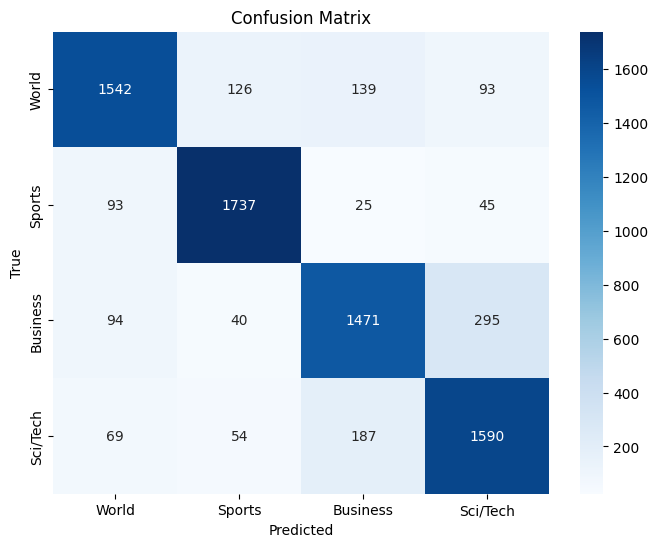

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()